# Connect to Drive

Pertama-tama kita connect kan ke Google Drive agar bisa mengakses data yang kita punya.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [ ]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

## Load Data

In [ ]:
data_clean = pd.read_csv("/content/drive/MyDrive/BINAR DSC/GOLD/preprocessed_indonesian_tweet_clean.csv", encoding='latin-1')

In [ ]:
data_clean

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok usaha lacak perhati gue ka...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat beri tau kamu gue gaul dengan...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku pikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau mata tapi lihat dari ma...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum sudah lihat dongok dari awal tambah lagi ...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal bicara ndasmu kamu yang sekata kata,1,1,1,0,0,0,1,0,0,1,0,0
13165,kasur mana enak,0,1,0,0,0,0,0,0,0,0,0,0
13166,hati hati tidak dan lagi bosan duh,0,0,0,0,0,0,0,0,0,0,0,0
13167,bom yang real mudah deteksi bom yang kubur sua...,0,0,0,0,0,0,0,0,0,0,0,0


Terlebih dahulu kita mengecek data yang akan kita proses sebelum dilakukan analisis

## Cek data 5 teratas dan terbawah

In [ ]:
df_tweet = data_clean['Tweet']
df_tweet.head(11)

0     di saat semua cowok usaha lacak perhati gue ka...
1     siapa yang telat beri tau kamu gue gaul dengan...
2     41 kadang aku pikir kenapa aku tetap percaya p...
3     aku itu aku dan ku tau mata tapi lihat dari ma...
4     kaum sudah lihat dongok dari awal tambah lagi ...
5                                    ya dan kawan kawan
6     deklarasi pilih kepala daerah 2018 aman dan an...
7     gue baru saja selesai re watch aldnoah zero pa...
8     nah admin belanja satu lagi po baik nak makan ...
9                                enak lagi kalau sambil
10    tidak gue punya jari tengah buat kamu belum gu...
Name: Tweet, dtype: object

In [ ]:
df_tweet.tail(11)

13158    maaf si anu adalah cocok sama mustafa kemal al...
13159    ada 2 buku aktivitas angry burung the film yan...
13160    nostalgia dengan budaya nos tal gia dan rindu ...
13161    itu orang buat dari apa bikin gue kata kasar mulu
13162    kepala polisi daerah biadab dan tidak punya ot...
13163    orang yahudi kristen dan muslim yang belum per...
13164      jangan asal bicara ndasmu kamu yang sekata kata
13165                                      kasur mana enak
13166                   hati hati tidak dan lagi bosan duh
13167    bom yang real mudah deteksi bom yang kubur sua...
13168                mana situ beri itu cuma foto ya kutil
Name: Tweet, dtype: object

## Cek jumlah kolom dan total data

Data yang diolah memiliki 2 kolom dan total data 11000

In [ ]:
data_clean.shape

(13169, 13)

In [ ]:
data_clean.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13164    False
13165    False
13166    False
13167    False
13168    False
Length: 13169, dtype: bool

## Cek total duplikat data

Total data yang duplikat sejumlah 67

In [ ]:
data_clean.duplicated().sum()

366

Menghilangkan data yang duplikat

In [ ]:
# data_clean = data_clean.drop_duplicates()

Cek total data yang duplikat. Hasilnya data yang duplikat sudah tidak ada.

In [ ]:
# data_clean.duplicated().sum()

0

## Cek Missing Values

Jalankan perintah di bawah untuk mendeteksi missing values.

In [ ]:
data_clean.isna().head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


Jalankan perintah dibawah untuk melihat persentase missing values dari setiap kolom. Terlihat pada setiap kolom memiliki persentase 0. Ini menandakan data kita aman dari missing values

In [ ]:
data_clean.isna().sum()/data_clean.shape[0]

Tweet            0.005543
HS               0.000000
Abusive          0.000000
HS_Individual    0.000000
HS_Group         0.000000
HS_Religion      0.000000
HS_Race          0.000000
HS_Physical      0.000000
HS_Gender        0.000000
HS_Other         0.000000
HS_Weak          0.000000
HS_Moderate      0.000000
HS_Strong        0.000000
dtype: float64

Cek kondisi data terakhir

In [ ]:
data_clean.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok usaha lacak perhati gue ka...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat beri tau kamu gue gaul dengan...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku pikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau mata tapi lihat dari ma...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum sudah lihat dongok dari awal tambah lagi ...,1,1,0,1,1,0,0,0,0,0,1,0


## Buat kolom baru bernama "total_char" berisi panjang karakter dari setiap teks.

In [ ]:
data_clean['Tweet'] = data_clean['Tweet'].fillna('')
data_clean['total_char'] = data_clean['Tweet'].apply(len)
data_clean[['Tweet','total_char']]

,Tweet,total_char
0,di saat semua cowok usaha lacak perhati gue ka...,116
1,siapa yang telat beri tau kamu gue gaul dengan...,88
2,41 kadang aku pikir kenapa aku tetap percaya p...,225
3,aku itu aku dan ku tau mata tapi lihat dari ma...,56
4,kaum sudah lihat dongok dari awal tambah lagi ...,50
...,...,...
13164,jangan asal bicara ndasmu kamu yang sekata kata,47
13165,kasur mana enak,15
13166,hati hati tidak dan lagi bosan duh,34
13167,bom yang real mudah deteksi bom yang kubur sua...,100


Cek 5 data teratas lagi. Terlihat sekarang sudah ada kolom "total_char" yang berisi masing-masing panjang karakter dari setiap teks.


## Buat kolom baru bernama "total_word" berisi banyaknya kata dari setiap teks.

Cek 5 data teratas lagi. Terlihat sekarang sudah ada kolom "total_word" yang berisi masing-masing panjang kata dari setiap teks.

In [ ]:
data_clean['total_word'] = data_clean['Tweet'].apply(lambda sent: len(sent.split()))

In [ ]:
data_clean[['Tweet','total_char','total_word']]

,Tweet,total_char,total_word
0,di saat semua cowok usaha lacak perhati gue ka...,116,21
1,siapa yang telat beri tau kamu gue gaul dengan...,88,17
2,41 kadang aku pikir kenapa aku tetap percaya p...,225,39
3,aku itu aku dan ku tau mata tapi lihat dari ma...,56,13
4,kaum sudah lihat dongok dari awal tambah lagi ...,50,9
...,...,...,...
13164,jangan asal bicara ndasmu kamu yang sekata kata,47,8
13165,kasur mana enak,15,3
13166,hati hati tidak dan lagi bosan duh,34,7
13167,bom yang real mudah deteksi bom yang kubur sua...,100,18


# Analyze

Descriptive Analytic dalam kasus teks sering disebut Exploratory Data Analysis (EDA). EDA secara sederhana bisa dimaknai sebagai proses untuk memahami data sebelum diproses untuk tujuan tertentu atau langkah selanjutnya.

Apakah proses akan berhenti dalam tahap EDA atau tidak tergantung Problem Definition yang sudah kita tentukan sebelumnya.

Berdasarkan variabel (kolom) yang diproses, EDA bisa dibagi sebagai berikut:


*   Univariat Analysis: Analisis dengan melibatkan satu variabel
*   Bivariat Analysis: Analisis dengan melibatkan dua variabel:
*   Multivariat Analysis: Analisis dengan melibatkan lebih dari dua variabel.

Dari jenis analisis di atas tidak semua harus dilakukan. Lagi-lagi tergantung Problem Definition dan karaktistik data yang kita miliki.



## Univariate Analysis

### Descriptive Statistic

Untuk mengeksplorasi data kita bisa menggunakan ilmu Statistika Deskriptif. Terkait Statistik Deskriptif bisa kita pelajari lebih dalam pada chapter selanjutnya.

Menurut Statistika Deskriptif, ada 3 cara untuk mendeskripsikan data:

* Measures of Central Tendency
   * Mean
   * Median
   * Mode
* Measures of Spread
   * Range
   * Quartile dan Interquartile Range
   * Variance
   * Standard deviasi
* Measures to Describe Shape of Distribution
   * Skewness
   * Kurtosis

#### Measures of Central Tendency
Merupakan suatu cara untuk mendeskripsikan posisi tengah dari distribusi frekuensi pada suatu kelompok

##### Mean

Digunakan untuk mencari rata-rata dari kolom/variabel yang bertipe numerical.

Pada hasil berikut mean "total_char" memiliki rata-rata panjang karakter 189.6, sedangkan "total_word" memiliki rata-rata 33.0 kata.

In [ ]:
data_clean.mean()

<ipython-input-50-b4ae71ca91e8>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.mean()


HS                0.422280
Abusive           0.382945
HS_Individual     0.271471
HS_Group          0.150809
HS_Religion       0.060217
HS_Race           0.042980
HS_Physical       0.024527
HS_Gender         0.023236
HS_Other          0.284000
HS_Weak           0.256891
HS_Moderate       0.129471
HS_Strong         0.035918
total_char       97.999013
total_word       16.836510
dtype: float64

##### Median

Digunakan untuk mencari nilai tengah dari suatu data numerical yang diurutkan. Jika jumlah data ganjil, maka nilai median tepat berada tengah dari data, sedangkan apabila genap maka nilai median berada diantara kedua nilai yang berada ditengah.

Pada hasil berikut median "total_char" memiliki nilai tengah panjang karakter 161.0, sedangkan "total_word" memiliki nilai tengah 28.0 kata.

In [ ]:
data_clean.median()

<ipython-input-55-677934b1a936>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.median()


HS                0.0
Abusive           0.0
HS_Individual     0.0
HS_Group          0.0
HS_Religion       0.0
HS_Race           0.0
HS_Physical       0.0
HS_Gender         0.0
HS_Other          0.0
HS_Weak           0.0
HS_Moderate       0.0
HS_Strong         0.0
total_char       85.0
total_word       15.0
dtype: float64

##### Mode

Digunakan untuk mencari frekuensi data yang paling sering muncul.

Pada hasil berikut mode "total_char" memiliki frekuensi yang paling sering muncul yakni panjang karakter 120, sedangkan "total_word" memiliki frekuensi yang paling sering muncul 10 kata.

In [ ]:
data_clean['total_char'].mode()

0    42
Name: total_char, dtype: int64

In [ ]:
data_clean['total_word'].mode()

0    10
Name: total_word, dtype: int64

#### Measures of Spread
Merupakan suatu cara untuk mendeskripsikan seberapa menyebar data yang ada.

##### Range

Digunakan untuk mencari perbedaan antara nilai terbesar dengan nilai terkecil pada data.

Pada hasil berikut range "total_char" memiliki perbedaan sebesar 564, sedangkan "total_word" memiliki perbedaan sebesar 109 kata.

In [ ]:
range_total_word = data_clean.total_word.max() - data_clean.total_word.min()
range_total_word

65

In [ ]:
range_total_char = data_clean.total_char.max() - data_clean.total_char.min()
range_total_char

398

##### Quartile dan IQR

Digunakan ketika data dibagi menjadi 4 bagian (25%). Terdapat 3 jenis Quartile yaitu Q1 yang merupakan nilai antara median dengan data terkecil, Q2 yang merupakan Median data, dan Q3 adalah nilai antara median dengan data terbesar.

Nilai Quartile selanjutnya dikombinasikan dengan nilai Interquartile Range (IQR). Untuk menghasil IQR kita dapat mengurangi Q3 dengan Q1. Dari IRQ kita dapat menemukan batas atas dan batas bawah dari sebuah data.

Hasil dibawah menunjukkan nilai sisi bawah dari "total_char" tidak memiliki outlier, sedangkan sisi atas dari "total_char" memiliki outlier.

In [ ]:
# Cari nilai minimum
p0 = data_clean.total_char.min()

# Cari nilai maksimum
p100 = data_clean.total_char.max()

# Cari Quartile 1
q1 = data_clean.total_char.quantile(0.25)

# Cari Quartile 2
q2 = data_clean.total_char.quantile(0.5)

# Cari Quartile 3
q3 = data_clean.total_char.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_char':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()
print("Batas Atas 'total_char':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_char': -91.5
Nilai minimum 0
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_char': 272.5
Nilai maksimum 398
Ada outlier dari sisi batas atas


Hasil dibawah menunjukkan nilai sisi bawah dari "total_word" tidak memiliki outlier, sedangkan sisi atas dari "total_word" memiliki outlier.

In [ ]:
# Cari nilai minimum
p0 = data_clean.total_word.min()

# Cari nilai maksimum
p100 = data_clean.total_word.max()

# Cari Quartile 1
q1 = data_clean.total_word.quantile(0.25)

# Cari Quartile 2
q2 = data_clean.total_word.quantile(0.5)

# Cari Quartile 3
q3 = data_clean.total_word.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_word':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()
print("Batas Atas 'total_word':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_word': -14.5
Nilai minimum 0
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_word': 45.5
Nilai maksimum 65
Ada outlier dari sisi batas atas


##### Variance

Digunakan untuk mengukur seberapa menyebar data yang ada dari mean-nya. Jika nilai variance dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka nilai dari suatu variabel/kolom tersebut menjauhi mean.

Nilai variance dari "total_char" sebesar "14600.7" menjauhi (lebih dari) dari nilai mean dari "total_char" sebesar "189.614561".

Nilai variance dari "total_word" sebesar "446.9" menjauhi (lebih dari) dari nilai mean dari "total_word" sebesar "33.0".

In [ ]:
data_clean.var()

<ipython-input-58-bf5f6676ae10>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.var()


HS                  0.243978
Abusive             0.236316
HS_Individual       0.197789
HS_Group            0.128075
HS_Religion         0.056595
HS_Race             0.041136
HS_Physical         0.023928
HS_Gender           0.022698
HS_Other            0.203360
HS_Weak             0.190913
HS_Moderate         0.112717
HS_Strong           0.034630
total_char       4491.587712
total_word        129.897555
dtype: float64

##### Standard Deviation

Digunakan untuk mengukur penyebaran observasi dalam kumpulan data relatif terhadap rata-ratanya. Jika nilai standard deviation dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka data dari suatu variabel/kolom tersebut menjauhi mean.

Nilai standard deviation dari "total_char" sebesar "14600.7" menjauhi (lebih dari) dari nilai mean dari "total_char" sebesar "189.614561".

Nilai standard deviation dari "total_word" sebesar "446.9" menjauhi (lebih dari) dari nilai mean dari "total_word" sebesar "33.0".

In [ ]:
data_clean.std()

<ipython-input-59-1482e22c9906>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.std()


HS                0.493941
Abusive           0.486123
HS_Individual     0.444735
HS_Group          0.357876
HS_Religion       0.237898
HS_Race           0.202819
HS_Physical       0.154685
HS_Gender         0.150659
HS_Other          0.450954
HS_Weak           0.436935
HS_Moderate       0.335733
HS_Strong         0.186092
total_char       67.019308
total_word       11.397261
dtype: float64

#### Measures of Describe Shape of Distribution
Merupakan suatu cara untuk mendeskripsikan distribusi data berdasarkan suatu grafik.

##### Skewness
Merupakan suatu cara untuk mengukur ketidaksimetrisan suatu distribusi nilai.

*   Apabila nilai skewness = 0, maka menunjukkan data berdistribusi normal.
*   Apabila nilai skewness < 0, maka menunjukkan skewness bernilai negatif.
*   Apabila nilai skewness > 0, maka menunjukkan skewness bernilai positif.

Jika kita melihat hasil di bawah nilai skewness pada "total_char" dan "total_word" bernilai positif.

In [ ]:
data_clean.skew()

<ipython-input-60-ef19e5f39134>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.skew()


HS               0.314743
Abusive          0.481659
HS_Individual    1.027865
HS_Group         1.951762
HS_Religion      3.697803
HS_Race          4.507363
HS_Physical      6.148549
HS_Gender        6.329997
HS_Other         0.958113
HS_Weak          1.112960
HS_Moderate      2.207621
HS_Strong        4.988423
total_char       0.780452
total_word       0.809311
dtype: float64

##### Kurtosis
Merupakan suatu cara untuk menunjukan derajat keruncingan, semakin besar nilai kurtosis maka kurva semakin runcing.

Kurtosis memiliki kondisi sebagai berikut:

*   Kurtosis yang memiliki nilai 3 berarti memiliki Distribusi Normal
*   Jika nilai Kurtosis kurang dari 3, dikatakan bersifat playkurtik, yang berarti cenderung menghasilkan lebih sedikit nilai outlier.
*   Jika nilai kurtosis lebih besar dari 3, dikatakan leptokurtik, yang berarti cenderung menghasilkan lebih besar nilai outlier.

Jika kita melihat hasil di bawah nilai kurtosis pada "total_char" dan "total_word" bernilai kurang dari 3 yang berarti memiliki sifat "playkurtik".

In [ ]:
data_clean.kurtosis()

<ipython-input-61-1a275a5a648b>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.kurtosis()


HS               -1.901226
Abusive          -1.768273
HS_Individual    -0.943638
HS_Group          1.809650
HS_Religion      11.675521
HS_Race          18.319105
HS_Physical      35.810092
HS_Gender        38.074647
HS_Other         -1.082184
HS_Weak          -0.761437
HS_Moderate       2.874027
HS_Strong        22.887838
total_char       -0.050679
total_word       -0.037945
dtype: float64

### Visualization

Selain dengan pendekatan Descriptive Statistic, untuk mengetahui insight melalui Univariate Analysis bisa menggunakan visualisasi.

#### Pie

Berikut contoh visualisasi Pie Chart untuk melihat persebaran total sentimen per kelasnya.

Berdasarkan gambar di bawah terlihat sentimen terbanyak ada di sentimen positif, selanjutnya sentimen negatif, dan yang terakhir sentimen netral.

<Axes: title={'center': 'Porsi Hate Spech'}, ylabel='HS'>

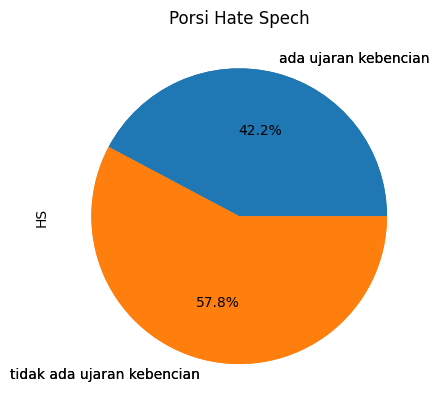

In [ ]:
data_clean["Ket_HS"] = data_clean["HS"].apply(lambda x: 'ada ujaran kebencian' if x >= 1 else 'tidak ada ujaran kebencian')
data_clean.groupby('Ket_HS').HS.count().plot(kind='pie')
plt.title('Porsi Hate Spech')
data_clean.groupby('Ket_HS').HS.count().plot(kind='pie', autopct='%1.1f%%')

<Axes: title={'center': 'Porsi Abusive Word'}, ylabel='HS'>

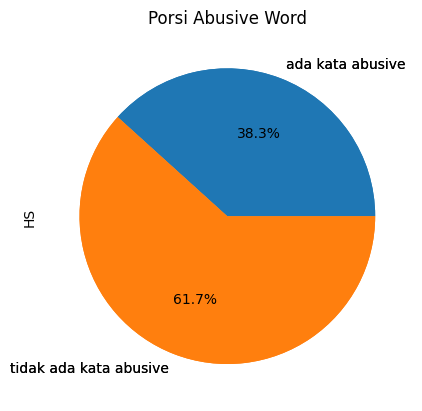

In [ ]:
data_clean["Ket_Abusive"] = data_clean["Abusive"].apply(lambda x: 'ada kata abusive' if x >= 1 else 'tidak ada kata abusive')
data_clean.groupby('Ket_Abusive').HS.count().plot(kind='pie')
plt.title('Porsi Abusive Word')
data_clean.groupby('Ket_Abusive').HS.count().plot(kind='pie', autopct='%1.1f%%')

#### Histogram

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah karakter (total_char).

Berdasarkan gambar di bawah terlihat rata-rata panjang karakter dari data teks yang kita miliki ada pada sekitar 100-200 karakter.

<Axes: >

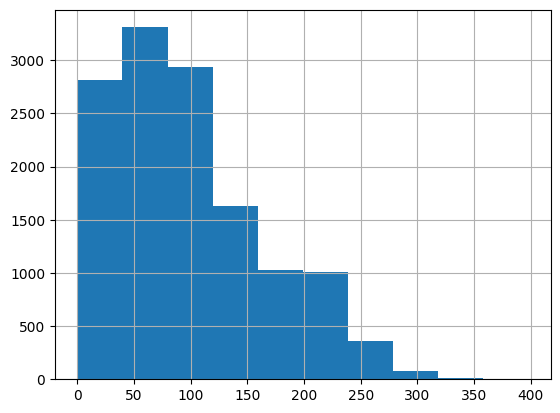

In [ ]:
data_clean.total_char.hist()

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah word (total_word).

Berdasarkan gambar di bawah terlihat rata-rata panjang kata dari data teks yang kita miliki ada pada sekitar 20-40 kata.

<Axes: >

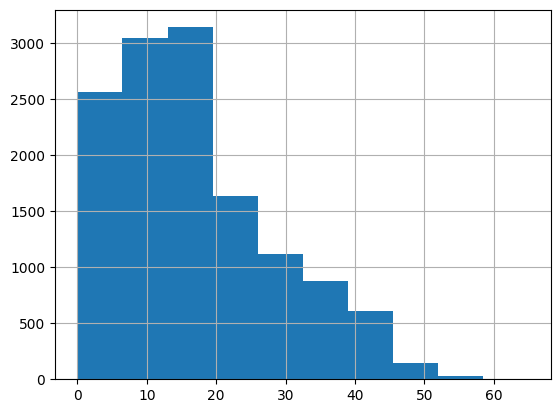

In [ ]:
data_clean.total_word.hist()

##### Histogram & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Histogram.

Hasilnya:

*   Pada sentimen negatif, mayoritas panjang karakternya 0-200 karakter dan panjang katanya sekitar 50 kata.
*   Pada sentimen netral, mayoritas panjang karakternya sekitar 100 karakter dan panjang katanya sekitar 25 kata.
*   Pada sentimen positif, mayoritas panjang karakternya 200-400 karakter dan panjang katanya sekitar 30-70 kata.


<Axes: >

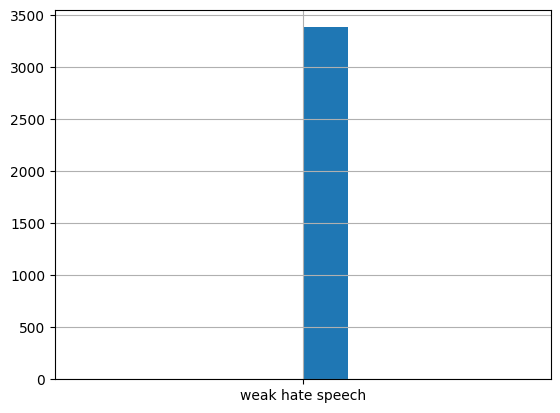

In [ ]:
data_clean["Ket_HS_Weak"] = data_clean["HS_Weak"].apply(lambda x: 'weak hate speech' if x >= 1 else 'bukan')
weak_hate_speech = data_clean.loc[data_clean['Ket_HS_Weak'] == 'weak hate speech']
weak_hate_speech["Ket_HS_Weak"].hist()

In [ ]:
df_neutral = df.loc[df['HS_Moderate'] == 'neutral']

df_neutral.hist()

In [ ]:
df_positive = df.loc[df['label'] == 'positive']

df_positive.hist()

#### Wordcloud

Kita bisa melihat kata yang sering muncul dengan visualisasi wordcloud. Terlihat pada visualisasi di bawah kata yang sering muncul adalah "dan", "dengan", "karena", "di", "sini", "tempat", "nya".

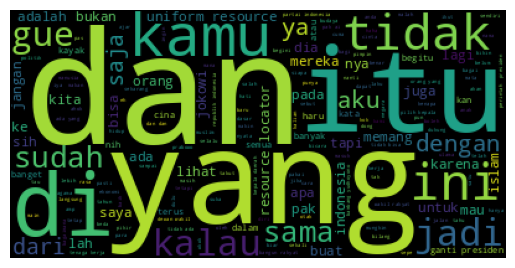

In [ ]:
from wordcloud import WordCloud
text = ' '.join(data_clean['Tweet'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Wordcloud & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Worcloud.

Hasilnya:

*   Pada sentimen negatif, kata yang sering muncul adalah "nya", "yang", dan "dan".
*   Pada sentimen netral, kata yang sering muncul adalah "dan", "yang", "di", "untuk", dan "dengan".
*   Pada sentimen positif, kata yang sering muncul adalah "dan", "di", "sini", "tempat", "nya", dan "enak".

In [ ]:
from wordcloud import WordCloud

df_negative = df.loc[df['label'] == 'negative']

text = ' '.join(df_negative['text'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import WordCloud

df_neutral = df.loc[df['label'] == 'neutral']

text = ' '.join(df_neutral['text'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import WordCloud

df_positive = df.loc[df['label'] == 'positive']

text = ' '.join(df_positive['text'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Bivariate Analysis

### Descriptive Statistic

Untuk melakukan Bivariate Analysis kita bisa mengkombinasikan pendekatan statistik dan visualisasi sama seperti Univariate Analysis.

#### Pearson Correlation
Pearson Correlation mengukur linear dependence antara 2 variabel X dan Y.
Hasilnya berupa angka diantara -1 dan 1, dimana:
- 1: total positive linear correlation,
- 0: no linear correlation, the two variables most likely do not affect each other
- -1: total negative linear correlation.

Pada hasil di bawah, antara "total_word" dan "total_char" memiliki korelasi positif karena mendekati nilai 1:



*   "total_world" -> "total_char": 0.99
*   "total_char" -> "total_world": 0.99



In [ ]:
df.corr()

### Visualization

#### Scatter

Angka korelasi positif sebelumnya terkonfirmasi dari visualisasi scatter di bawah. Terlihat pola yang dihasilkan linier dari pojok kiri bawah ke pojok kanan atas.

In [ ]:
df.plot(x='total_word',y='total_char',kind = 'scatter')

#### Bar

##### Total Word + Label

Kita bisa melihat kombinasi visualisasi antara total_word dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki kata yang paling panjang

In [ ]:
df.groupby('label').total_word.sum().plot(kind='bar')

##### Total Char + Label

Kita bisa melihat kombinasi visualisasi antara total_char dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki karakter yang paling panjang

In [ ]:
df.groupby('label').total_char.sum().plot(kind='bar')

# Conclusion

Berdasarkan analisis yang sudah kita lakukan, ada beberapa insight yang bisa kita ambil:

*   Berdasarkan Univariate Analysis:
  *  Dalam Descriptive Statistic menunjukkan data yang kita olah memiliki outlier namun tidak terlalu signifikan
  *  Dalam visualisasi menunjukkan:
      *  Total karakter dan total kata memiliki panjang 100-200 karakter dan 24-40 kata.
      *  Sentimen terbanyak adalah sentimen positif, selanjutnya sentimen negatif, dan yang terakhir sentimen netral.
      *  Total karakter dan kata yang paling banyak adalah sentimen positif yakni 200-400 karakter dan 30-70 kata.
      *  Pada sentimen positif, kata yang sering muncul adalah "dan", "di", "sini", "tempat", "nya", dan "enak".

*   Berdasarkan Bivariate Analysis:
  *  Dalam Descriptive Statistic menunjukkan variabel total karakter dan total kata memiliki korelasi positif.
  *  Dalam visualisasi menunjukkan:
      *  Variabel total karakter dan total kata terkonfirmasi memiliki korelasi positif
      *  Total karakter dan kata yang paling banyak adalah sentimen positif.